In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.corr().style.background_gradient() # to check the correlation without using a heatmap

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [7]:
df.corr()["Price"].sort_values()

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.335664
Area Population                 0.408556
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

- By using this method we can find the correlation of prices as compared to the Average no. of bedrooms, Area population etc.

-Now by using iloc method we will divide the dataset into X(independent values) and Y(Dependent Values)

### Dividing Dataset into x and y

In [9]:
x = df.iloc[:,:-2].values
y = df.iloc[:,-2].values
# using the values method we can convert the data into numpy array

In [10]:
x

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [11]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

### Creating the model (dividing training and testing set)

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size= 0.2, random_state=1)

### Performing Linear Regression by importing necessary Module

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)
ypred = linreg.predict(xtest)

### Displaying Intercept 

In [17]:
linreg.intercept_

-2637185.6400765334

### Displaying Coefficient

In [18]:
linreg.coef_

array([2.16667346e+01, 1.64990052e+05, 1.20784238e+05, 1.54252468e+03,
       1.51503697e+01])

#### To interpret the Coefficient more easily we need to convert this data into a Dataframe

In [20]:
x = df.iloc[:,:-2]
y = df.iloc[:,-2]

In [21]:
coef_df = pd.DataFrame(linreg.coef_,x.columns, columns = ["Coefficient"])
coef_df

,Coefficient
Avg. Area Income,21.666735
Avg. Area House Age,164990.051829
Avg. Area Number of Rooms,120784.238317
Avg. Area Number of Bedrooms,1542.524676
Area Population,15.150370


### Now, interpreting the coefficient has become much more easier!!

- for every unit growth in Average Area income, we estimate that the price will increase upto $21.66

- for every unit growth in Average area House age, we estimate that the price will increase upto      $164990.05

- for every unit growth in Average area no. of rooms, we estimate that the price will increase   upto $120784.23 

- for every unit growth in Average area no. of bedrooms, we estimate that the price will increase   upto $1542.52 

- for every unit growth in Area population, we estimate that the price will increase upto $15.150

#### Visualising the Data after training and testing

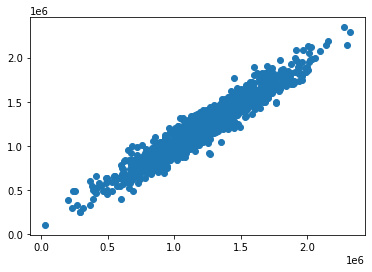

In [23]:
plt.scatter(ytest,ypred)

<AxesSubplot:ylabel='Density'>

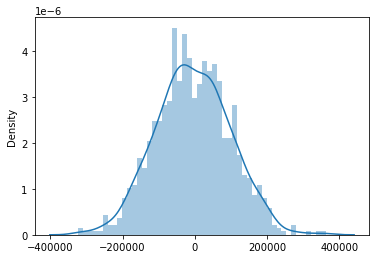

In [26]:
sns.distplot((ytest-ypred), bins = 50) 

#### Displaying evaluation Metrics

- It is used to evaluate the the performance and the accuracy of the model 



- we need to import some modules for evaluation

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 

- MAE or Mean Absolute error represents the average of the absolute difference between the actual values and the predicted values in the given Dataset

In [34]:
print(f"MeanAbsoluteError :-  {mean_absolute_error(ytest,ypred)}")

MeanAbsoluteError :-  82494.73770124864


- Mean Squared Error or MSE represents the average of the squared difeerence between the actual and the predicted values in the given Dataset

In [35]:
print(f"MeanSquaredError :-  {mean_squared_error(ytest,ypred)}")

MeanSquaredError :-  10543597313.62453


- Root Mean Squared Error or RMSE represents the squareroot Mean Squared Error. It measures the Standard Deviation of the residuals

In [36]:
print(f"RootMeanSquaredError :-  {np.sqrt(mean_squared_error(ytest,ypred))}")

RootMeanSquaredError :-  102682.02040096665


- r2_score helps to determine the accuracy of the model

In [37]:
print(f"rSquared :-  {(r2_score(ytest,ypred))}")

rSquared :-  0.9215935236936377


### CONCLUSION

- After evaluating this Dataset we can say that this model is 92% accurate and can be used for future predictions
- All the evaluation metrics has been displayed in the above Dataset